# Hyperparameter optimization

In machine learning hyperparameter optimization is the process of finding a set of optimal hyperparameters for a machine learning model. Hyperparameters need to be distinguished from model's parameters. Model's parameters are set by the learning algorithm during the training process, while hyperparameters are set by engineers or developers before initiating the training. In practice, we usually look for a set of hyperparameters that minimize the loss function:

$$
x^{*} = argmin \; f(x),
$$

where $f(x)$ is the function which we are trying to minimize (usually the loss function) and $x_{*}$ is the optimal setup of the hyperparameter vector that we are looking for.

It is important to note here that $f(x)$ has some characteristics that make this work tedious:

* $f(x)$ is indifferentiable in regards to $x$, which means that gradient based techniques are off the table.
* $f(x)$ often has multiple local minima.
* $x$ is a vector of hyperparameters that often have different types (integer, real, categorical).
* Hyperparameters influence each other, so we cannot find the optimal solution by tuning each hyperparameter independently.
* It takes a long time to compute the value of $f(x)$ for a given value of $x$, meaning that is extremely expensive to calculate the value of $f(x)$ for a lot of different inputs.
* From our perspective $f(x)$ is more or less a black box that we can probe only a couple of times.

A practical example of this process would be training a deep neural network for a regression task where we use mean squared error (MSE) as our loss function. Let us assume that the training process takes around 10 hours, during training the learning algorithm will find a set of weights and biases that minimizes the loss function. However, there are a bunch of hyperparameters that also influence the quality of the model (the loss function) and those need to be set by the engineer, to name a few: learning rate, batch size, optimizer, network architecture... Each of these hyperparameters has many values and testing all combinations is infeasible as testing a single combination takes 10 hours. We can alleviate this by testing only a subset of hyperparameters, the scientific field of hyperparameter optimization tries to find methods for getting an optimal set of hyperparameters as quickly as possible.

So, one might look at the problem of hyperparameter optimization as a problem of finding a set of hyperparameters that minimizes the loss function. For the purpose of this lecture we will create a toy loss function which means that we know exactly what it looks like in regards to our hyperparameter. Next, we will try finding the optimal value for the hyperparameter by using different hyperparameter optimization techniques.

The code block below defines the shape of our loss function, we are interested in finding the value of our hyperparmeter $x$ that minimizes this function on the [0, 3] interval.

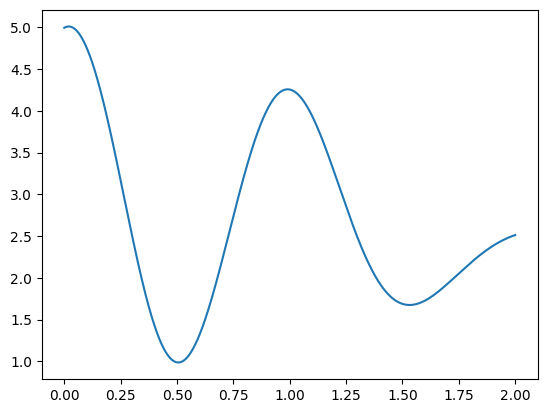

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def loss_function(x, print_value = False):
    """
    A random toy loss function.

    Parameters:
        x (float): the input value
        print_value (bool): whether to print the value of the loss function
    """
    value = x + (1 - 1 / 1 * np.sin(12 * x + 3) / (10 + x) + (3 * np.cos(3 * x)) ** 2) / (x ** 4 + 2)
    if print_value:
        # if value is a numpy array
        if hasattr(value, "__iter__"):
            for i in range(len(x)):
                print(f"loss_function({x[i]}) = {value[i]}")
        else:
            print(f"loss_function({x}) = {value}")
    return value

# plot the loss function from 0 to 2
start = 0
end = 2
x_loss = np.linspace(start, end, 1000)
y_loss = [loss_function(i) for i in x_loss]
plt.plot(x_loss, y_loss)

As you can see the optimal setting for our hyperparameter $x$ is around 0.5. For the sake of this lecture, we will assume that we can only afford to evalute $f(x)$ (train our model) 10 times. The first method we will talk about is called manual search.

## Manual search

We will only briefly mention this method as it is not transparent and reproducible which is something we should always strive towards. The logic here is that the engineer tries a couple of values and somehow imagines the shape of the loss function in his head. After that the engineer uses his intuition and expertise to move around and explore that space in an educated manner. Obviously, this is suboptimal and not completely reproducible by other engineers. But this approach is often used in the ideation/exploration phase to get some kind of a feeling about how various hyperparameters influence our model's training. But when looking for the optimal set of hyperparameters this approach is usually discarded and other, more systematic techniques take its place. Below is a (silly) example about how one might use this technique to find the optimal $x$ in our use case.

In [3]:
# let's start at the beginning
x_manual = []
y_manual = []

# 1 - let's start at 0
x = 0
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(0) = 4.992943999597006


In [4]:
# 2 - let's try the other end
x = 2
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(2) = 2.5120913789034724


In [5]:
# 3 - let's try in between
x = 1
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1) = 4.2538830711829085


In [6]:
# 4 - now it is larger, let's look at 1.5
x = 1.5
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1.5) = 1.6879166240422552


In [7]:
# 5 - looking good, keep going
x = 1.75
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1.75) = 2.0520636823431264


In [8]:
# 6
x = 1.625
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1.625) = 1.7674063916252687


In [9]:
# 7
x = 1.55
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1.55) = 1.678921323871439


In [10]:
# 8
x = 1.525
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1.525) = 1.6753007114861445


In [11]:
# 9
x = 1.53
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

loss_function(1.53) = 1.6747847257642352


loss_function(1.56) = 1.6844910130088455

best x = 1.53, loss = 1.6747847257642352


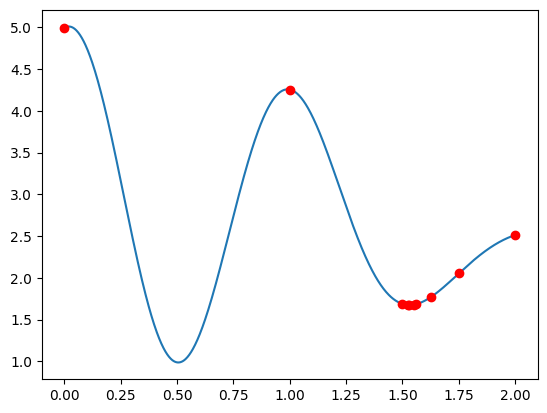

In [12]:
# 10
x = 1.56
x_manual.append(x)
y_manual.append(loss_function(x, print_value=True))

# find minimum y_manual and it's x_manual
min_y_manual = min(y_manual)
min_x_manual = x_manual[y_manual.index(min_y_manual)]
print(f"\nbest x = {min_x_manual}, loss = {min_y_manual}")

# plot loss_function from above along with x_manual and y_manual points
plt.plot(x_loss, y_loss)
plt.plot(x_manual, y_manual, 'ro')

By manually moving around and looking at the outputs (performing the "grad student descent") we reached the value $x = 1.53$, as we can see from the figure above, this is not really the global optimum and there are a bunch of better values. This is a silly illustration where we have a single dimension (single hyperparameter), you can imagine that this becomes even worse in higher dimensions where hyperparameters might also interact.

## Grid search

Grid search, or parameter sweep, is probably the most traditional method for peforming hyperparmaeter optimization. For each of the hyperparameters we define a discrete subset of values we would like to explore and then test all combinations. As expected, the sparsity of the grid increases as we have more and more parameters, since we can usually test only a small amount of all possible combinations, we have to reduce the resolution of our search protocol in order to retain a feasible amount of combinations.

In our case, when we have only a single hyperparameter, we will be able to test 10 values of $x$ which are approximately 0.22 units away from each other. If we had another parameter, so we now have $x_1$ and $x_2$, we have to decrease the $x_1$ resolution in order to remain within the threshold of 10 managable tests. For example, with two hyperparameters we could only test 5 values of $x_1$ and 2 values of $x_2$. This outlines the main issue with grid search, it does not scale well. Because of this, we often have to set constant values to some hyperparameters and only explore how a small subset of remaining hyperparameters influences the final result.

Below is an example of grid search on our toy example:


loss_function(0.0) = 4.992943999597006
loss_function(0.2222222222222222) = 3.52576010719189
loss_function(0.4444444444444444) = 1.1374625763645532
loss_function(0.6666666666666666) = 1.8736361937801944
loss_function(0.8888888888888888) = 3.9511427764208147
loss_function(1.1111111111111112) = 3.8708740652393256
loss_function(1.3333333333333333) = 2.2696827506610675
loss_function(1.5555555555555554) = 1.6817408890949044
loss_function(1.7777777777777777) = 2.1203773081514945
loss_function(2.0) = 2.5120913789034724

best x = 0.4444444444444444, loss = 1.1374625763645532


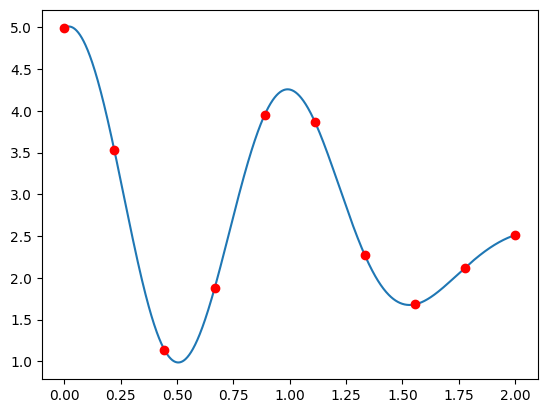

In [13]:
# create the grid
x_grid = np.linspace(start, end, 10)

# evaluate the loss function at each point in the grid
y_grid = loss_function(x_grid, print_value=True)

# find minimum y_grid and it's x_grid
min_x_grid = x_grid[np.argmin(y_grid)]
print(f"\nbest x = {min_x_grid}, loss = {min(y_grid)}")

# plot loss_function from above along with x_grid and y_grid points
plt.plot(x_loss, y_loss)
plt.plot(x_grid, y_grid, 'ro')

As you can see, grid search found a quite decent value at $x = 0.4444$. However, there are still better values to be found. The next approach that we will take a look at is called random search.

## Random search

Random Search replaces the exhaustive enumeration of all defined combinations by selecting them randomly, meaning that we can define a larger amount of combinations and then test only a subset of them through random selection. A benefit over grid search is that random search can explore many more values than grid search could for continuous hyperparameters. It can outperform grid search, especially when only a small number of hyperparameters affects the final performance of the machine learning algorithm. In this case, the optimization problem is said to have a low intrinsic dimensionality. Random search also allows the inclusion of prior knowledge by specifying the distribution from which to sample.

loss_function(0.8223368989906752) = 3.451951723365188
loss_function(0.5635207727164515) = 1.1155961351076713
loss_function(0.46280791159369095) = 1.0605538674264041
loss_function(1.407584294027482) = 1.8995265193481545
loss_function(0.003014854863796046) = 4.997387368013143
loss_function(0.6215992956814826) = 1.476159437990983
loss_function(0.14466406868555626) = 4.397329164444156
loss_function(0.3988611793582977) = 1.4390134075594876
loss_function(0.09736165123032703) = 4.766403257680248
loss_function(0.9806282361349363) = 4.253481575406758

best x = 0.46280791159369095, loss = 1.0605538674264041


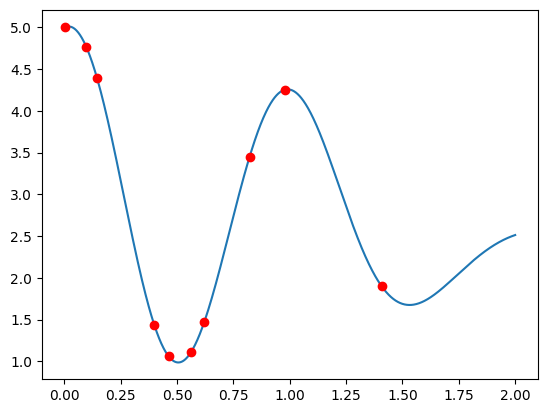

In [14]:
# get 10 random values from 0 to 2
x_random = np.random.uniform(start, end, 10)

# evaluate the loss function at each point in the grid
y_random = loss_function(x_random, print_value=True)

# find minimum y_grid and it's x_grid
min_x_random = x_random[np.argmin(y_random)]
print(f"\nbest x = {min_x_random}, loss = {min(y_random)}")

# plot loss_function from above along with x_random and y_random points
plt.plot(x_loss, y_loss)
plt.plot(x_random, y_random, 'ro')

Well, random is random so the end results is left to chance. While we probably won't get an optimal result, we usually get a decent result. As always, increasing the number of combinations we try should give better results in the long term. The next set of algorithm for hyperparameter optimizations is called evolutionary optimization.

## Evolutionary optimization

Evolutionary optimization falls into the category of genetic algorithms, a well-known group of algorithms that mimicks the natural process of evolution to explore the search space. In evolutionary algorithms we create the inital generation of candidates, where each candidate has its own genome. In the scope of hyperparameter optimization a genome is a set of hyperparameter values. Next, we evaluate these candidates. After the candidates are evaluated we create a new generation by combining candidates that did the best in the previous evaluation, this is done with the crossover operation, which merges two parent candidates into a child candidate. Furthremore, to explore the search space more efficiently there is a small chance that a mutation will trigger on the child, a mutation will slightly change the genome (the value of the hyperparameter in our case).

We repeat the process until we see no improvement between generations or until our resources allow it.

Generation 0: best individual = 0.7228920982969611, best fitness = 2.4492646961923707
Generation 1: best individual = 0.7228920982969611, best fitness = 2.4492646961923707
Generation 2: best individual = 0.7228920982969611, best fitness = 2.4492646961923707

Generation 0: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 1: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 2: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 3: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 4: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 5: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 6: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 7: best individual = 0.4339415165801015, best fitness = 1.1932986928958091
Generation 8: best individual = 0.4339415165801015, b

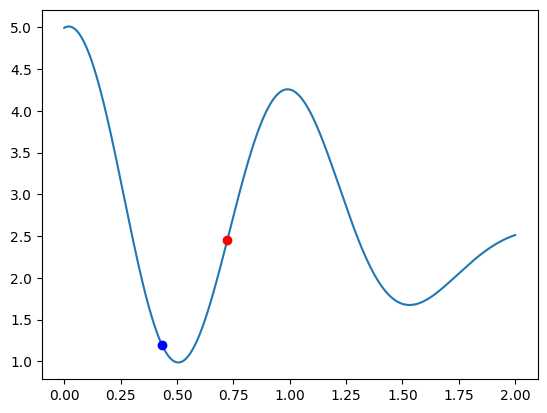

In [15]:
def evolutionary_optimization(population_size, generations):
    """
    Simple implementation of the evolutionary optimization algorith.

    Parameters:
        population_size (int): number of individuals in the population
        generations (int): number of generations to run the algorithm
    """

    # create the initial population
    population = np.random.uniform(start, end, population_size)

    # loop through the generations
    for generation in range(generations):
        # evaluate the population
        population_fitness = loss_function(population)

        # find the best individual
        best_fitness = min(population_fitness)

        best_individual = population[np.argmin(population_fitness)]

        # print the best individual
        print(
            f"Generation {generation}: best individual = {best_individual}, best fitness = {best_fitness}"
        )

        # create the next generation
        next_population = np.array([])

        # keep the best individual
        next_population = np.append(next_population, best_individual)

        # create the rest of the next generation
        for _ in range(population_size - 1):
            # population_fitness
            population_probs = population_fitness / sum(population_fitness)

            # pick two individuals based on their fitness
            individual_1 = np.random.choice(population, p=population_probs)
            individual_2 = np.random.choice(population, p=population_probs)

            # child is the average of parents
            child = (individual_1 + individual_2) / 2

            # mutation?
            if np.random.uniform(0, 1) < 0.1:
                child += np.random.uniform(-0.1, 0.1)

            # clamp the child to start, end
            child = min(max(start, child), end)

            # append the child
            next_population = np.append(next_population, child)

        # replace the population with the next generation
        population = next_population

    return (best_individual, best_fitness)

# run the evolutionary optimization algorithm within our constraints
best_individual, best_fitness = evolutionary_optimization(3, 3)
print("")

# use more resources (100 evaluations)
best_individual2, best_fitness2 = evolutionary_optimization(10, 10)

# plot
plt.plot(x_loss, y_loss)
plt.plot(best_individual, best_fitness, 'ro')
plt.plot(best_individual2, best_fitness2, 'bo')


One of the problems is that genetic algorithms are hard to parallelize. We can parallelize evalutions within a generation, but not across generations as creation of new generations is sequential. Genetic algorithms are usually also quite slow, so this approach is not that popular for hyperparameter optimization, but the logic behind genetic algorithms is used in many scientific fields.

## Bayesian optimization

To recap, evolutionary approaches are in most cases too time consuming to be practically useful, while the main problem with grid search and random search is that they do not use any information from the previous evaluations of $f(x)$. This is suboptimal, probing the loss function can give additional information that can help in our hyperparameter search and make it more efficient. The more information we have, the better we can model the loss function and by facilitating this information we can pick the next candidate hyperparameters in a better way. And this is the core idea behind Bayesian optimization. Bayesian optimization uses bayesian modelling to build a surrogate function that tries to mimic the loss function. The more actual measurements we have about how the loss function behaves with regards to hyperparameters, the better we can model it. And the better the model of the loss function, the better our next candidate hyperparameters can be. What is important is that the surrogate function can be easily probed, meaning that we can quickly test a number of candidate hyperparameters to find the best ones that are then used to evalute the loss function $f(x)$ in the usual, slow and tedious way. In the literature, you will also sometime hear the term Sequential Model-Based Optimization (SMBO), this is essentialy the same thing as Bayesian optimization. It will become clear a bit later why this name is also appropriate.

The pseudocode for Bayesian optimization looks like this:

```
0. generate the starting candidate hyperparameters
while n ≤ N do
    1. evaluate the candidate hyperparameters
    2. use existing evaluations to build the surrogate function
    3. use the surrogate and acquisition functions to generate new candidate hyperparameters in an informed way
    4. n++
```

So, surrogate function is our replacement model for the real loss function. Another new term used above is the acquisition function. Acquisition function is the technique by which the surrogate function is used to select the next hyperparameter candidate from the search space.

### Surrogate functions (models)

The whole method is called Bayesian optimization because Bayesian methods are used for surrogate models as a rule. There are many reasons for this:

* We can easily incorporate prior knowledge about possible good values of ceratin hyperparameters into our surrogate model.
* Bayesian methods give us an estimate of uncertainty, which is important for figuring out the next set of candidate hyperparameters.
* They are flexible enough to accommodate many different shapes of loss functions in many dimensions (Bayesian optimization usually works well up to 20 dimensions/hyperparameters).

The most commonly used model are the Gaussian processes (GP). GP are useful when we have some data points, and we want to make predictions about values at new, unobserved points. GP help us do this by treating our predictions as random variables. Instead of giving a single prediction, a GP provides a probability distribution over possible values for each point, as you will see, this is very important when looking for a new set of candidate hyperparameters.

Some other surrogate models that can be commonly found in packages for Bayesian optimization are the Tree Parzen Estimator (TPE) and Bernoulli-beta bandits. Here, we will not delve under the hood of these surrogate models and will only build a very high level understading about what these surrogate models are trying to achieve. A detailed explanation can be found in these resources:

* Distill - A Visual Exploration of Gaussian Processes, https://distill.pub/2019/visual-exploration-gaussian-processes.
* J Bergstra, R Bardenet, Y Bengio, B Kégl - Algorithms for hyper-parameter optimization, http://papers.neurips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf.
* Borealis AI - Bayesian optimization, https://www.borealisai.com/research-blogs/tutorial-8-bayesian-optimization.

### Acquisition functions

Once we have our surrogate function that is approximating the real loss function to the best of our ability, we use an acquisition function to find good candidate hyperparameters for the next iteration. The goal is to find an approach that balances exploitation and exploration. Expoitation means that we will focus on more promising areas where the surrogate function is predicting better results, exploration means that we will focus on areas that we did not yet visit to get a better feeling about what is happening there. Below are descriptions of some commonly used acquisition functions.

* Lower confidence bound (LCB) simply takes the predicted values from the surrogate function and subtracts the (double) predicted standard deviation at each point. This way we get the lower bound of the 95% confidence interval. We then pick our next candidate hyperparameters at the location where the minimal value of this bound is. This approach mainly targets exploitability and is prone to getting stuck in local minima as it does not have an exploration mechanism.
* Probability of Improvement (PI) estimates the probability that a point will improve upon the current best observed value. It considers the difference between the mean prediction and the current best value, taking into account the uncertainty in the surrogate model. This approach also does not have an explicit exploration mechanism.
* Expected Improvement (EI) selects points that have the potential to improve upon the best observed value. It quantifies the expected improvement over the current best value by considers the best observed value, the mean prediction of the surrogate model and its uncertainty. This approach tries to facilitate both exploitation and exploration mechanisms.

In the literature you will find several more acquisition functions, below is the implementation of the three we mentioned can be found below.

In [16]:
from scipy.stats import norm

def lower_confidence_bound(best_y, y_pred, y_std):
    """
    Lower confidence bound acquisition function.

    Parameters:
        best_y (float): the best observed value of the loss function so far
        y_pred (float): values of the surrogate function
        y_std (float): the standard deviation of the surrogate function
    """
    return best_y - y_pred + 2 * y_std

def probability_of_improvement(best_y, y_pred, y_std):
    """
    Probability of improvement acquisition function.

    Parameters:
        best_y (float): the best observed value of the loss function so far
        y_pred (float): values of the surrogate function
        y_std (float): the standard deviation of the surrogate function
    """
    z = (best_y - y_pred) / y_std
    pi = norm.cdf(z)
    return pi

def expected_improvement(best_y, y_pred, y_std):
    """
    Expected improvement acquisition function.

    Parameters:
        best_y (float): the best observed value of the loss function so far
        y_pred (float): values of the surrogate function
        y_std (float): the standard deviation of the surrogate function
    """
    delta = best_y - y_pred
    z = delta / y_std
    ei = delta * norm.cdf(z) + y_std * norm.pdf(z)
    return ei


### Putting it all together

At this point we have all the information we need to use Bayesian optimization in practice. The code snippet below uses GP with a radial basis function kernel (RBF) for building the surrogate function. You could use anything suitable for the surrogate function, as long as it can fit the data well and it outputs both the mean prediction and the uncertainty in it. For finding new candidate hyperparameters based on the surrogate function you can use one of the above approaches. 

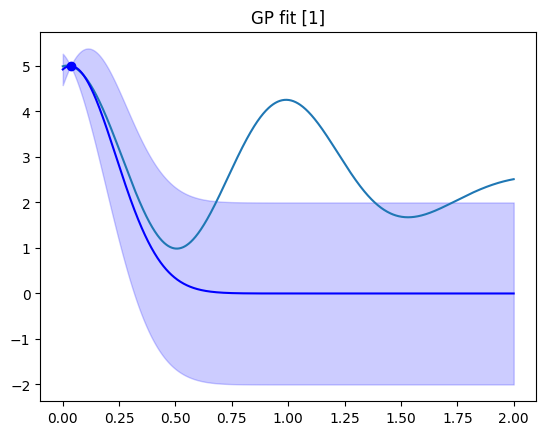

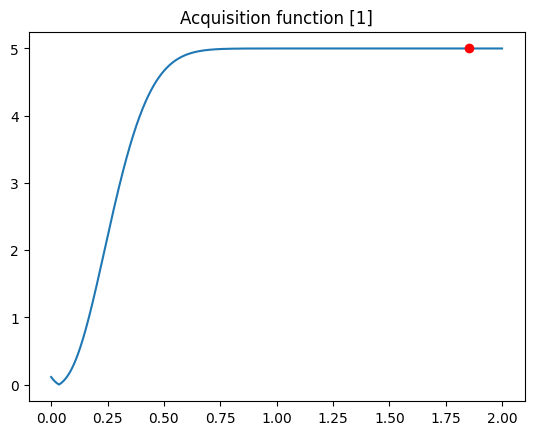

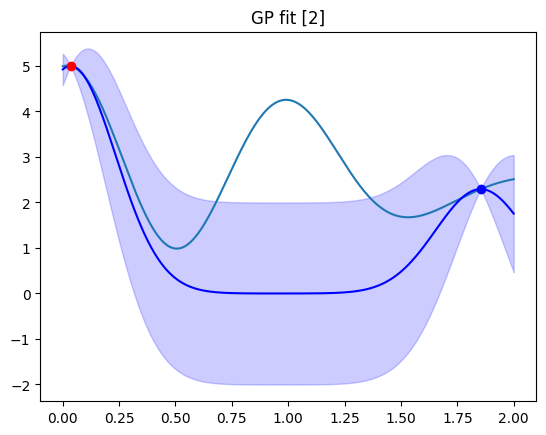

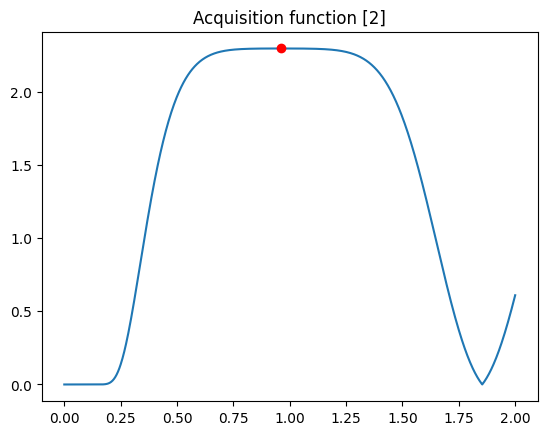

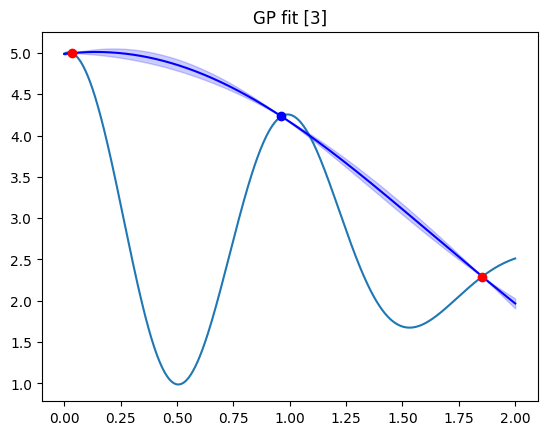

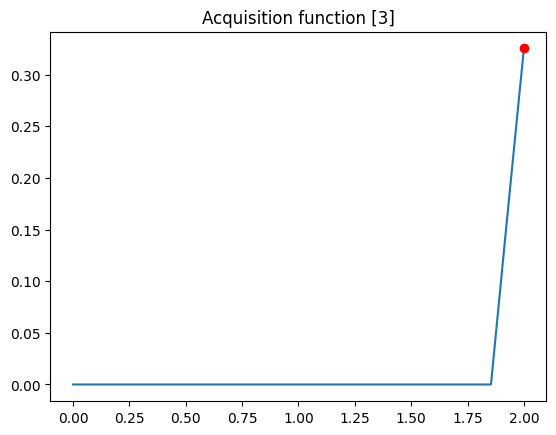

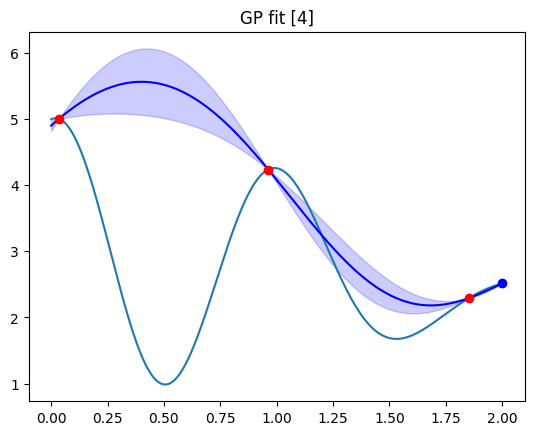

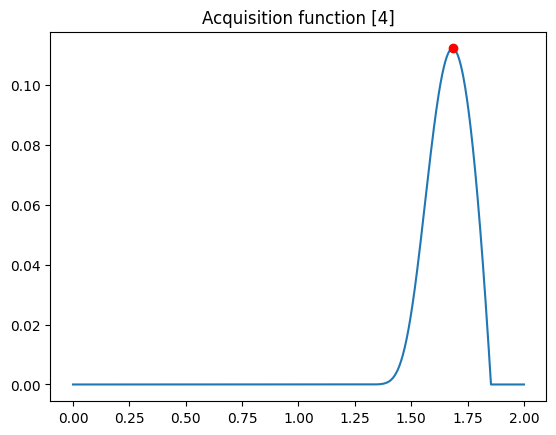

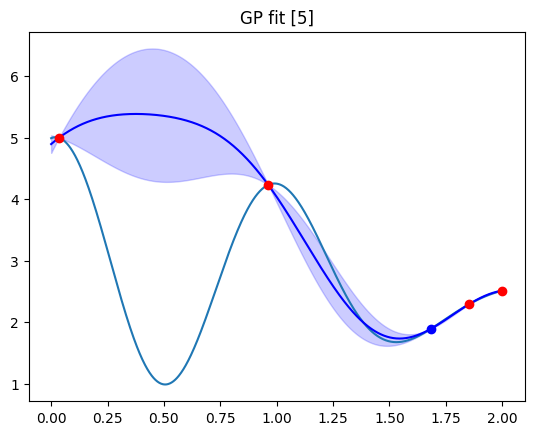

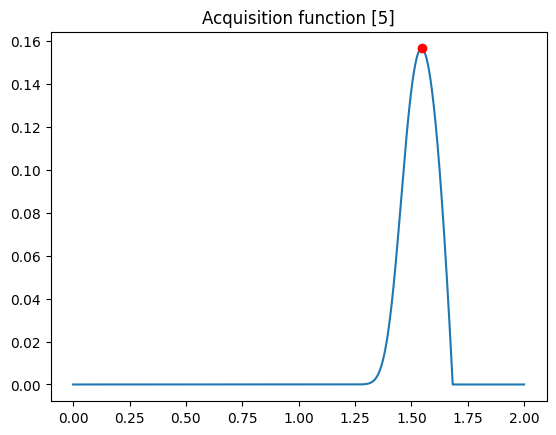

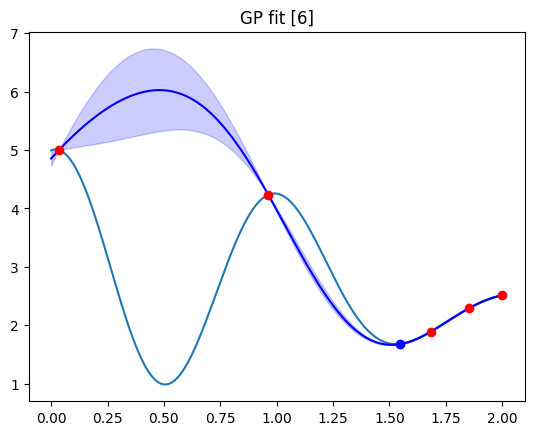

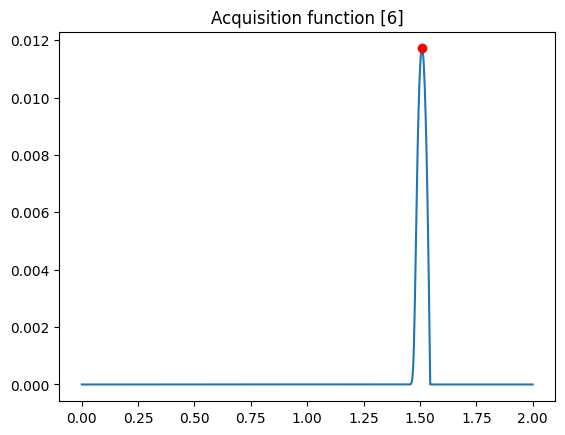

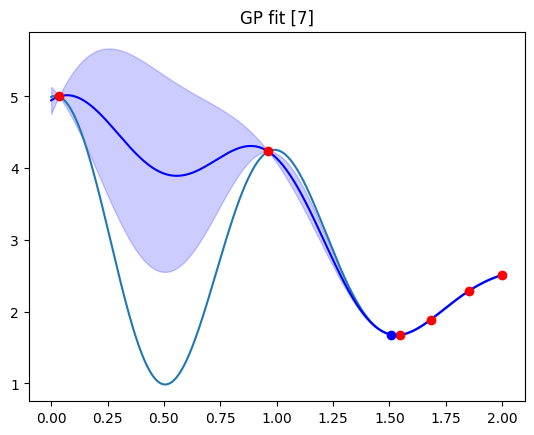

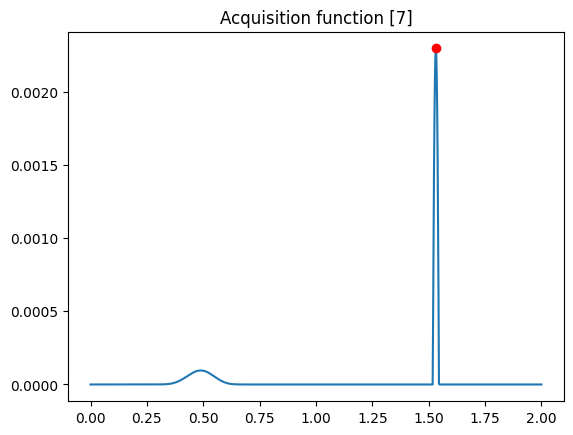

/Users/juredemsar/miniconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


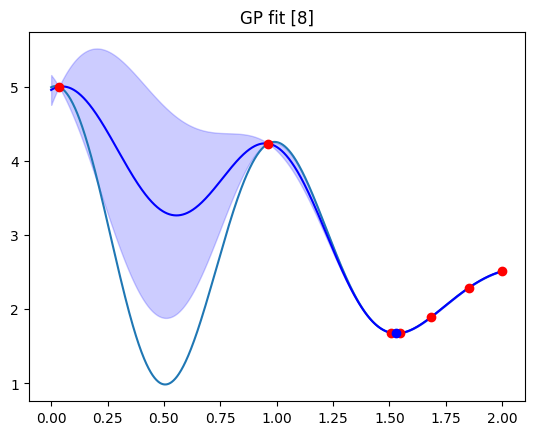

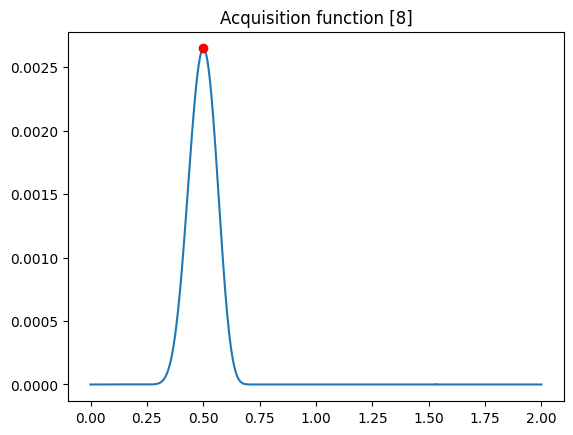

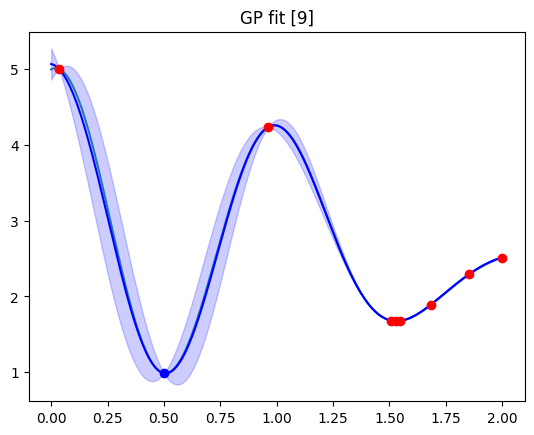

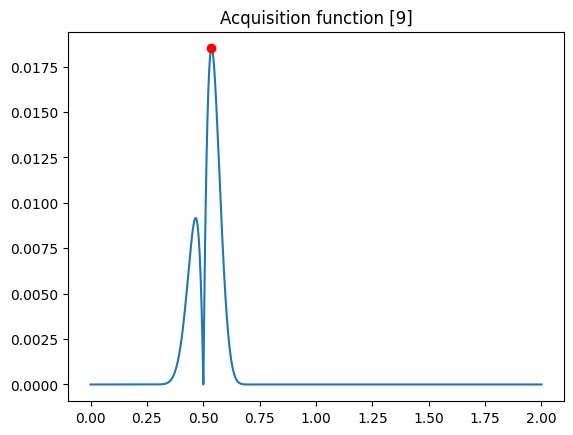

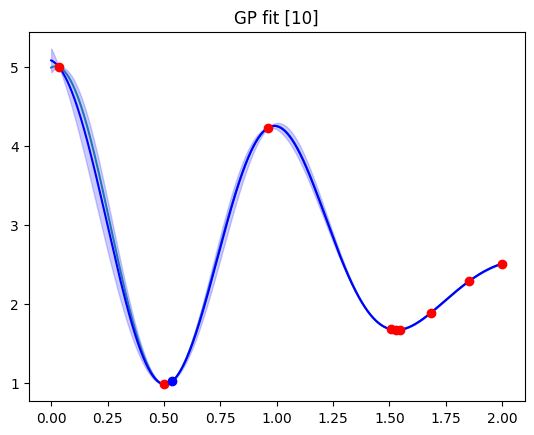

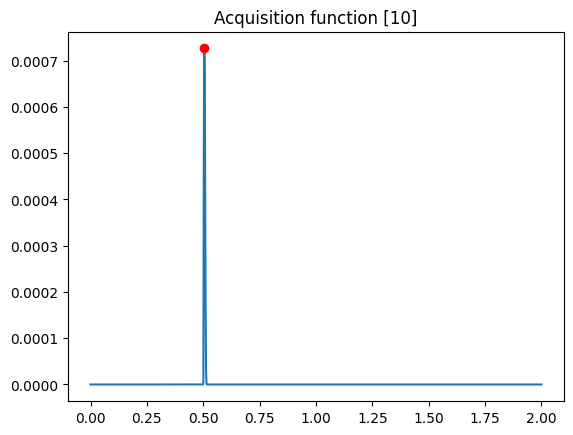


best x = 0.5005005005005005, loss = 0.98743341129974


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# GP with an RBF (squared exponential) kernel
# other popular kernels are Matern, dot product...
kernel = RBF(length_scale=0.2)
gp_model = GaussianProcessRegressor(kernel=kernel)

# storage for our hyperparameters and their loss
x_bo = []
y_bo = []

# get the first candidate
x = np.random.uniform(start, end)

# fit the Gaussian process model to the sampled points
for i in range(10):
    # evaluate the candidate
    y = loss_function(x)

    # append to the list
    x_bo.append(x)
    y_bo.append(y)

    # fit the model
    gp_model.fit(np.array(x_bo).reshape(-1, 1), y_bo)

    # predictions and std in our x_loss domain
    y_pred, y_std = gp_model.predict(x_loss.reshape(-1, 1), return_std=True)

    # plot
    plt.figure()
    plt.title(f"GP fit [{i+1}]")
    plt.plot(x_loss, y_loss)
    plt.plot(x_loss, y_pred, color="blue")
    plt.plot(x_bo[:-1], y_bo[:-1], "ro")
    plt.plot(x_bo[-1], y_bo[-1], "bo")
    plt.fill_between(
        x_loss, y_pred - 2 * y_std, y_pred + 2 * y_std, color="blue", alpha=0.2
    )
    plt.show()

    # get the next candidate with the acquisition function
    #af_y = lower_confidence_bound(min(y_bo), y_pred, y_std)
    #af_y = probability_of_improvement(min(y_bo), y_pred, y_std)
    af_y = expected_improvement(min(y_bo), y_pred, y_std)

    # find all points with max value
    max_af_y = 0
    af_y_indexes = []
    for j in range(len(af_y)):
        if af_y[j] > max_af_y:
            af_y_indexes = [j]
            max_af_y = af_y[j]
        elif af_y[j] == max_af_y:
            af_y_indexes.append(j)

    # pick one at random
    x_index = np.random.choice(af_y_indexes)
    x = x_loss[x_index]

    plt.figure()
    plt.title(f"Acquisition function [{i+1}]")
    plt.plot(x_loss, af_y)
    plt.plot(x, af_y[x_index], "ro")
    plt.show()

# report best
min_x_bo = x_bo[np.argmin(y_bo)]
print(f"\nbest x = {min_x_bo}, loss = {min(y_bo)}")


## Hybrid approaches

It is not uncommon that we combine multiple of the approaches above. In our toy example, we might first use grid or random search to get the value of the loss function at a couple of different location (for example 5) and then use those 5 locations as the starting point for the Bayesian optimization. This will give the Bayesian optimizer a much better starting point and a much better estimate of the surrogate function at the beginning. As a results, subsequent operations will be more efficient. 

## References

* Distill - A Visual Exploration of Gaussian Processes, https://distill.pub/2019/visual-exploration-gaussian-processes.
* J Bergstra, R Bardenet, Y Bengio, B Kégl - Algorithms for hyper-parameter optimization, http://papers.neurips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf.
* Adams R - A Tutorial on Bayesian Optimization for Machine Learning, https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/tutorials/tut8_adams_slides.pdf.
* Borealis AI - Bayesian optimization, https://www.borealisai.com/research-blogs/tutorial-8-bayesian-optimization.
* Yenigün O - Step-by-Step Guide to Bayesian Optimization: A Python-based Approach, https://medium.com/@okanyenigun/step-by-step-guide-to-bayesian-optimization-a-python-based-approach-3558985c6818.